In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split

In [27]:
# read the data
show = pd.read_csv('Data.csv')
show.head()

,Age,Gender,BMI,Region,No. Childred,Insurance Charges,Smoker
0,27.000000,male,30.500000,north,0,2494.022000,no
1,41.000000,female,31.020000,north,0,6185.320800,no
2,28.470049,male,26.667850,north,4,5549.324781,no
3,50.303537,female,30.881660,south,4,11366.350840,no
4,50.776743,male,26.844042,south,3,25729.184630,yes


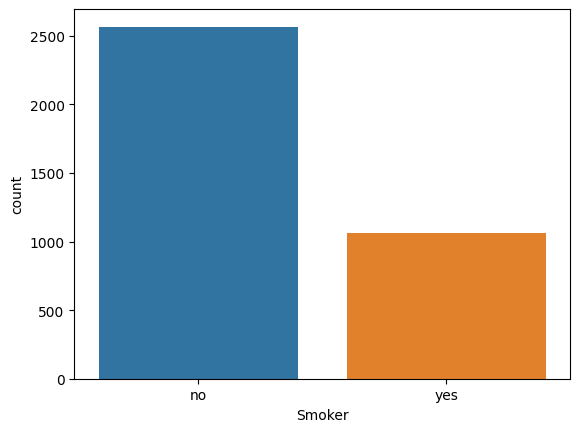

In [28]:
# Show the distribution of the class label
sns.countplot(x='Smoker', data=show)
plt.show()

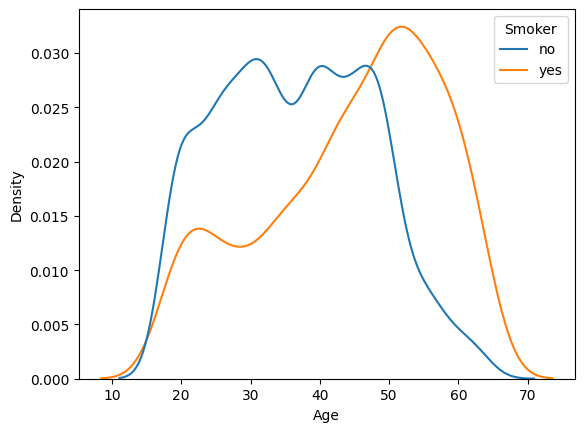

In [29]:
# show density plot for the age
sns.kdeplot(data=show, x='Age', hue='Smoker',common_norm=False)
plt.show()

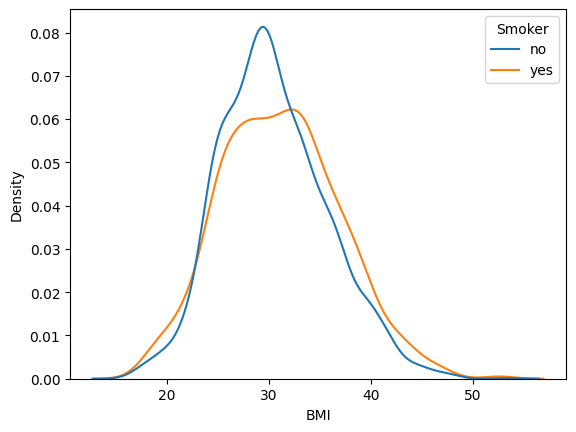

In [30]:
# show density plot for the BMI
sns.kdeplot(data=show, x='BMI', hue='Smoker',common_norm=False)
plt.show()

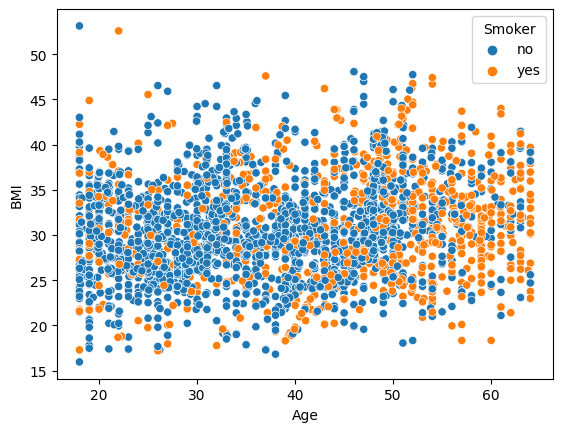

In [31]:
# to do scatterplot of data
sns.scatterplot(x='Age', y='BMI', hue='Smoker', data=show)
plt.show()


In [32]:
# train model 80% testing 20%
X = show.drop('Smoker', axis=1)
y = show['Smoker']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [33]:
# task knn 

In [34]:
# to show the value of region
show["Region"].value_counts()

north    1871
south    1759
Name: Region, dtype: int64

In [35]:
# to show the value of gender
show["Gender"].value_counts()

male      2029
female    1601
Name: Gender, dtype: int64

In [36]:
# to show the value of No. Childred
show["No. Childred"].value_counts()

0    619
2    615
5    610
3    605
4    604
1    577
Name: No. Childred, dtype: int64

In [37]:
# to show all that datatype in number
show_num = show.select_dtypes(np.number)
show_num

,Age,BMI,No. Childred,Insurance Charges
0,27.000000,30.500000,0,2494.022000
1,41.000000,31.020000,0,6185.320800
2,28.470049,26.667850,4,5549.324781
3,50.303537,30.881660,4,11366.350840
4,50.776743,26.844042,3,25729.184630
...,...,...,...,...
3625,48.232744,36.985389,4,10792.807440
3626,31.086960,38.815638,2,4708.529690
3627,59.000000,35.200000,0,12244.531000
3628,61.000000,22.040000,0,13616.358600


In [38]:
show_str = show.select_dtypes(np.object)
# show_str
cols = list(show_str.columns)

C:\Users\Ahmad\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:1: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  """Entry point for launching an IPython kernel.


In [39]:
# add the colum that datatype is object then convert it to number
def convert(df, columns):
    for col in columns:
        df[col] = pd.get_dummies(df[col], drop_first=True)
    return df

In [40]:
# her call convert function and show the dataset after convert object to number  
convert(show,cols)
# they do this step because the knn an NB and ANN don't exit value object
# يعني ما بوخذ قيمة من نوع  object 

,Age,Gender,BMI,Region,No. Childred,Insurance Charges,Smoker
0,27.000000,1,30.500000,0,0,2494.022000,0
1,41.000000,0,31.020000,0,0,6185.320800,0
2,28.470049,1,26.667850,0,4,5549.324781,0
3,50.303537,0,30.881660,1,4,11366.350840,0
4,50.776743,1,26.844042,1,3,25729.184630,1
...,...,...,...,...,...,...,...
3625,48.232744,0,36.985389,1,4,10792.807440,0
3626,31.086960,0,38.815638,0,2,4708.529690,0
3627,59.000000,0,35.200000,0,0,12244.531000,1
3628,61.000000,0,22.040000,1,0,13616.358600,1


In [41]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,roc_auc_score, classification_report, confusion_matrix
from sklearn.metrics import auc, roc_curve


Results for k = 4
Confusion Matrix: [[497  19]
 [ 34 176]]

Classification Report:               precision    recall  f1-score   support

           0       0.94      0.96      0.95       516
           1       0.90      0.84      0.87       210

    accuracy                           0.93       726
   macro avg       0.92      0.90      0.91       726
weighted avg       0.93      0.93      0.93       726


Results for k = 6
Confusion Matrix: [[498  18]
 [ 31 179]]

Classification Report:               precision    recall  f1-score   support

           0       0.94      0.97      0.95       516
           1       0.91      0.85      0.88       210

    accuracy                           0.93       726
   macro avg       0.93      0.91      0.92       726
weighted avg       0.93      0.93      0.93       726


Results for k = 9
Confusion Matrix: [[485  31]
 [ 25 185]]

Classification Report:               precision    recall  f1-score   support

           0       0.95      0.94      

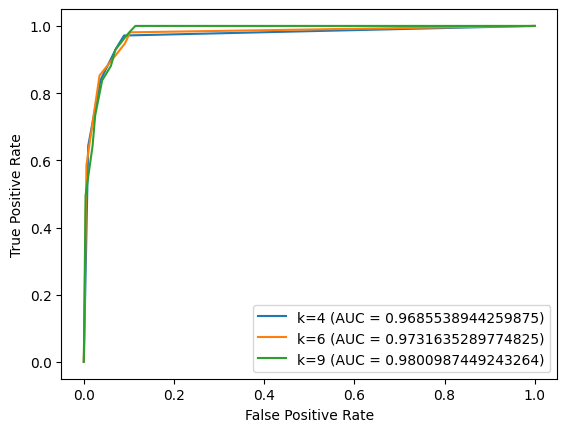

     k  Accuracy   ROC AUC
0  4.0  0.926997  0.968554
1  6.0  0.932507  0.973164
2  9.0  0.922865  0.980099


In [42]:
X_drop = show.drop('Smoker', axis=1)
y_drop_show = show['Smoker']
X_train_knn, X_test_knn, y_train_knn, y_test_knn = train_test_split(X_drop, y_drop_show, test_size=0.2, random_state=42)
k_values =[4,6,9]
classifiers = {}
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_knn, y_train_knn)
    classifiers[k] = knn

# Evaluate and compare the models
results = pd.DataFrame(columns=['k','Accuracy','ROC AUC'])

for k, knn_model in classifiers.items():
    y_pred = knn_model.predict(X_test_knn)
    accuracy = accuracy_score(y_test_knn, y_pred)
    roc_auc = roc_auc_score(y_test_knn, knn_model.predict_proba(X_test_knn)[:, 1])
    results = results.append({
        'k': k,
        'Accuracy': accuracy,
        'ROC AUC': roc_auc
    }, ignore_index=True)
    print(f"\nResults for k = {k}")
    print("Confusion Matrix:",confusion_matrix(y_test_knn, y_pred))
    print("\nClassification Report:",classification_report(y_test_knn, y_pred))
    
    fpr, tpr, _ = roc_curve(y_test_knn, knn_model.predict_proba(X_test_knn)[:, 1])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'k={k} (AUC = {roc_auc:})')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.show()
print(results)

In [73]:
# task Decision Tree C4.5
# chefboost is library for  decision tree 
from chefboost import Chefboost as chef
df = pd.read_csv("Data.csv")
# df.head()
config = {'algorithm': 'C4.5'}# her they get the type of decision tree 
model = chef.fit(df.copy(), config , target_label = "Smoker")# traing model


[INFO]:  2 CPU cores will be allocated in parallel running
C4.5  tree is going to be built...
-------------------------
finished in  9.411293506622314  seconds
-------------------------
Evaluate  train set
-------------------------
Accuracy:  87.30027548209367 % on  3630  instances
Labels:  ['no' 'yes']
Confusion matrix:  [[2388, 283], [178, 781]]
Precision:  89.4047 %, Recall:  93.0631 %, F1:  91.1972 %


Accuracy: 0.80

Confusion Matrix:
[[494  22]
 [121  89]]

Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.96      0.87       516
           1       0.80      0.42      0.55       210

    accuracy                           0.80       726
   macro avg       0.80      0.69      0.71       726
weighted avg       0.80      0.80      0.78       726



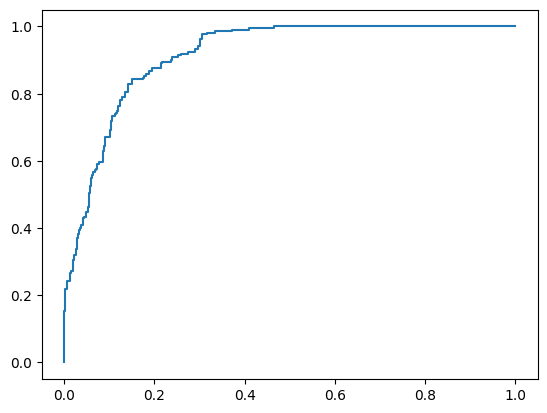

In [49]:
# task NB

from sklearn.naive_bayes import GaussianNB

X = show.drop('Smoker', axis=1)
y = show['Smoker']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

NB = GaussianNB()
NB.fit(X_train, y_train)

y_pred = NB.predict(X_test)

# Evaluate the performance of the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# roc/aus
fpr, tpr, _ = roc_curve(y_test, NB.predict_proba(X_test)[:, 1])
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr)

# Print the results
print(f"Accuracy: {accuracy:.2f}")
print("\nConfusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(class_report)

Epoch 1/500
91/91 [==============================] - 1s 4ms/step - loss: 0.6360 - accuracy: 0.6305 - val_loss: 0.5462 - val_accuracy: 0.7741
Epoch 2/500
91/91 [==============================] - 0s 2ms/step - loss: 0.5011 - accuracy: 0.7924 - val_loss: 0.4609 - val_accuracy: 0.8140
Epoch 3/500
91/91 [==============================] - 0s 2ms/step - loss: 0.4371 - accuracy: 0.8154 - val_loss: 0.4121 - val_accuracy: 0.8154
Epoch 4/500
91/91 [==============================] - 0s 2ms/step - loss: 0.3969 - accuracy: 0.8158 - val_loss: 0.3792 - val_accuracy: 0.8154
Epoch 5/500
91/91 [==============================] - 0s 2ms/step - loss: 0.3694 - accuracy: 0.8182 - val_loss: 0.3573 - val_accuracy: 0.8168
Epoch 6/500
91/91 [==============================] - 0s 2ms/step - loss: 0.3511 - accuracy: 0.8271 - val_loss: 0.3411 - val_accuracy: 0.8264
Epoch 7/500
91/91 [==============================] - 0s 2ms/step - loss: 0.3375 - accuracy: 0.8295 - val_loss: 0.3293 - val_accuracy: 0.8251
Epoch 8/500
9

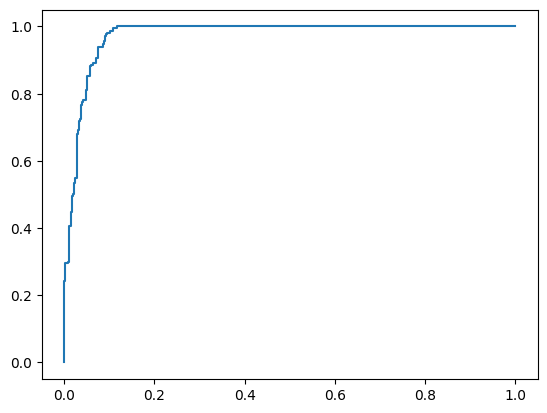

In [68]:
#  ANN(keras)

from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Input

X = show.drop('Smoker', axis=1)
y = show['Smoker']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# her use stander scaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model = Sequential()
model.add(Input(shape=(X_train_scaled.shape[1],))) #input hiden 
model.add(Dense(units=15, activation ="relu")) #hidden layer
model.add(Dense(units=1, activation ="sigmoid"))#output layer

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train_scaled, y_train, epochs=500, batch_size=32, validation_data=(X_test_scaled, y_test))

# Evaluate the performance of the model
y_pred_proba = model.predict(X_test_scaled)
y_pred = (y_pred_proba > 0.5).astype(int)

# Print the results
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# roc/auc curve
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr)


print(f"Accuracy: {accuracy:.2f}")
print("\nConfusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(class_report)